In [18]:
from pycwt import wct, wavelet, helpers,mothers
import numpy as np
import matplotlib.pyplot as plt
def scales_to_frequencies(scales, dt, mother):
    """Convert scales to frequencies."""
    fourier_factor = mother.flambda()  # Fourier factor for Morlet wavelet
    frequencies = 1 / (scales * fourier_factor * dt)
    return frequencies

# need to fix so that tickers are always represented at the same times
def CoherenceTransform(sig1,sig2):

    # Compute wavelet coherence
    dt = 1/11025  # Time step
    mother = wavelet.Morlet(6)
    W12, _, _, frequencies, _ = wct(sig1, sig2, dt,s0 = 2*dt*mother.flambda(), dj=1/100, J=200,sig = False)

    # Plot wavelet coherence
    #frequencies = 1 / (scales_to_frequencies(scales,dt,mother))
    extent = [0, len(sig1) * dt, frequencies[-1], frequencies[0]]

    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(W12), extent=extent, aspect='auto', cmap='jet')
    plt.colorbar(label='Wavelet Coherence')
    plt.title(F'Wavelet Coherence Analysis')
    plt.xlabel('Time (Days)')
    plt.ylabel('Frequency')
    plt.show()



C:\Users\24261951\AppData\Local\Temp\ipykernel_12180\3357827873.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data1 = wav.read('Fiddle.wav')
C:\Users\24261951\AppData\Local\Temp\ipykernel_12180\3357827873.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, audio_data2 = wav.read('fiddle2.wav')


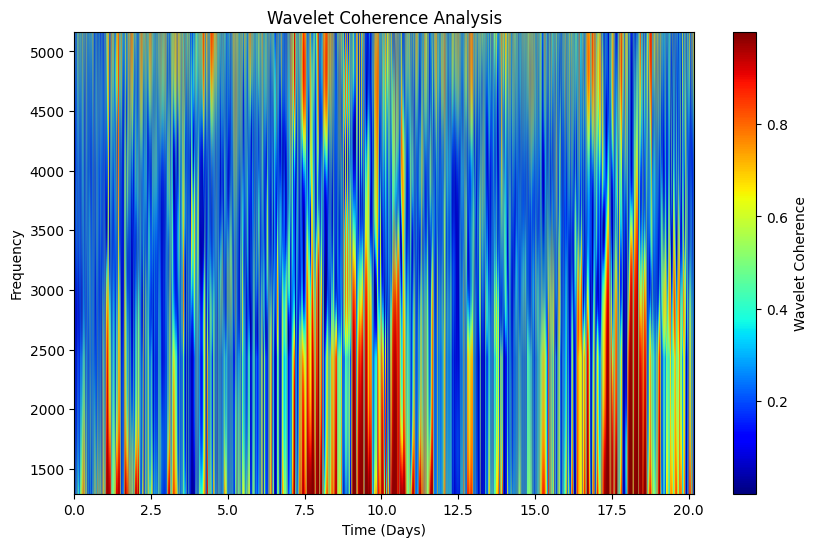

In [19]:
import scipy.io.wavfile as wav
sample_rate, audio_data1 = wav.read('Fiddle.wav')
_, audio_data2 = wav.read('fiddle2.wav')
audio_data1 = audio_data1[::4]
audio_data2 = audio_data2[::4]
sample_rate = sample_rate/4
CoherenceTransform(audio_data1,audio_data2)

In [5]:
sample_rate

11025.0